## Reading csv file.

<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\s'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_333598/2313112538.py:54: SyntaxWarning: invalid escape sequence '\m'
  label=f'Neutral ($\mu$): {neutral:.2f}s')
/tmp/ipykernel_333598/2313112538.py:58: SyntaxWarning: invalid escape sequence '\m'
  label=f'Aggressive ($\mu-2\sigma$): {aggressive:.2f}s')
/tmp/ipykernel_333598/2313112538.py:62: SyntaxWarning: invalid escape sequence '\m'
  label=f'Conservative ($\mu+2\sigma$): {conservative:.2f}s')
/tmp/ipykernel_333598/2313112538.py:65: SyntaxWarning: invalid escape sequ

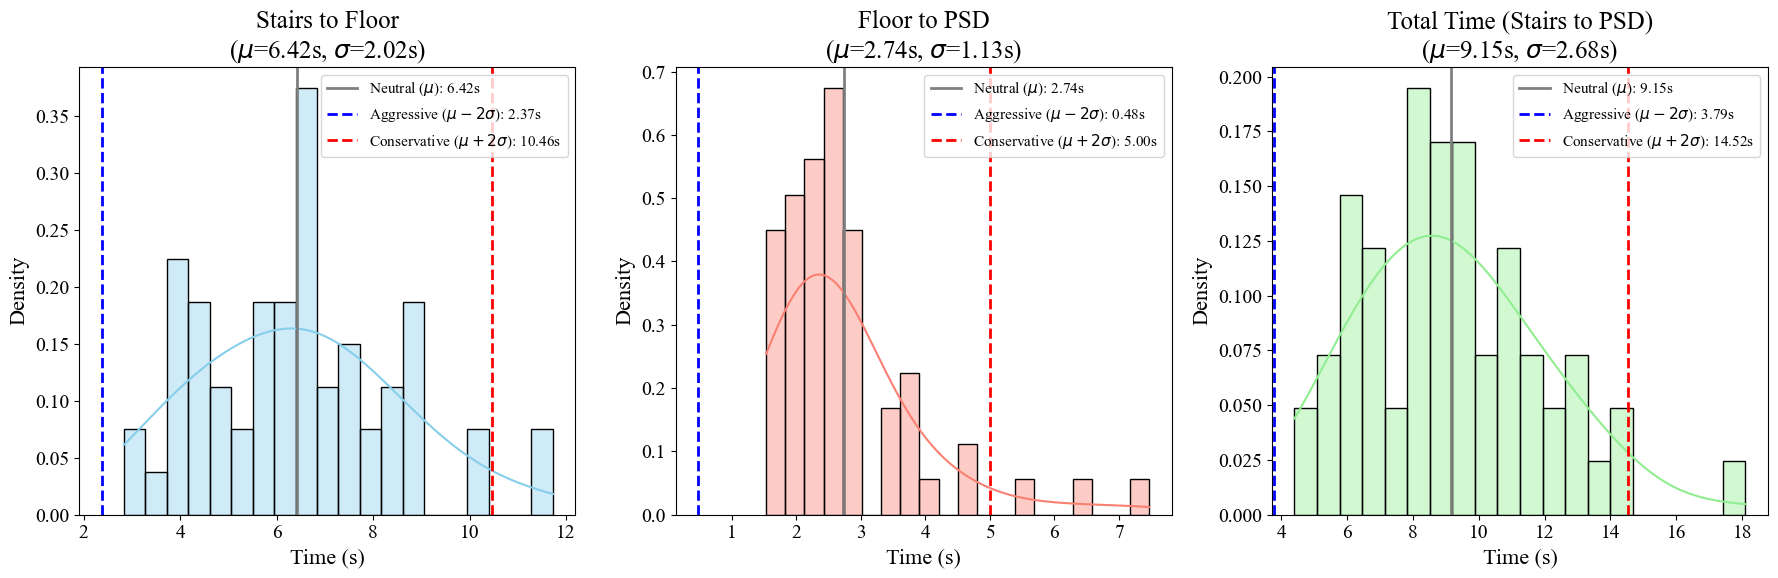

Plot saved as 'distribution_3_strategies.png'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. Configuration
# ==========================================
# Set Font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 14}) # Base font size

# ==========================================
# 2. Load and Prepare Data
# ==========================================
df = pd.read_csv('descending_passengers.csv', sep='\t')

# Filter out rows where '특징' is 'door2'
df_filtered = df[df['특징(door2는 제외)'] != 'door2'].copy()

# Calculate Total Time
df_filtered['Total Time'] = df_filtered['stairs --> floor [s]'] + df_filtered['floor -> psd [s]']

# ==========================================
# 3. Plotting
# ==========================================
cols = ["stairs --> floor [s]", "floor -> psd [s]", "Total Time"]
titles = ['Stairs to Floor', 'Floor to PSD', 'Total Time (Stairs to PSD)']
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(18, 6))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    
    # Calculate Statistics
    mu = df_filtered[col].mean()
    sigma = df_filtered[col].std()
    
    # Define Strategies
    aggressive = mu - 2*sigma
    neutral = mu
    conservative = mu + 2*sigma
    
    # Plot Histogram & KDE
    # bins=20 for better resolution, bw_adjust=1.5 for smoothness
    sns.histplot(df_filtered[col], kde=True, color=colors[i], 
                 stat="density", bins=20, alpha=0.4, 
                 kde_kws={'bw_adjust': 1.5}) 
    
    # Mark the 3 Strategies
    # Neutral (Mean)
    plt.axvline(neutral, color='gray', linestyle='-', linewidth=2, 
                label=f'Neutral ($\mu$): {neutral:.2f}s')
    
    # Aggressive (Fast, -2 sigma)
    plt.axvline(aggressive, color='blue', linestyle='--', linewidth=2, 
                label=f'Aggressive ($\mu-2\sigma$): {aggressive:.2f}s')
    
    # Conservative (Slow, +2 sigma)
    plt.axvline(conservative, color='red', linestyle='--', linewidth=2, 
                label=f'Conservative ($\mu+2\sigma$): {conservative:.2f}s')
    
    # Labels and Titles
    plt.title(f'{titles[i]}\n($\mu$={mu:.2f}s, $\sigma$={sigma:.2f}s)', fontsize=18)
    plt.xlabel('Time (s)', fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.legend(prop={'size': 11}, loc='upper right')

plt.tight_layout()
plt.savefig('distribution_3_strategies.png', dpi=300)
plt.show()
print("Plot saved as 'distribution_3_strategies.png'")